<a href="https://colab.research.google.com/github/BadrisRahmatullah/MachineLearning/blob/badris285/(versi_3)_Kegiatan_Modul_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Soal Praktikum Convolutional Neural Network**

## Kegiatan 1 **(Individu)** 
70 poin

Pada tugas praktikum modul 2 CNN kali ini anda diminta untuk membuat model dengan kombinasi layer Convolutional, Pooling, dan Fully Connected Layer

Praktikum kali ini anda diminta menggunakan dataset breast cancer yang bisa diunduh menggunakan kaggle API dari: https://www.kaggle.com/forderation/breakhis-400x


Dataset tersebut merupakan gambar mikroskopis dengan zoom sebesar 400x pada pasien yang mengalami kanker payudara (Breast Cancer), dimana pada dataset tesebut dibagi menjadi dua kelas yaitu Tumor ganas (Malignant) dan Tumor jinak (Benign). Dataset sudah dibagi menjadi folder training dan testing yang berbeda dengan struktur sebagai berikut:
- BreaKHis 400X/train/benign/*kumpulan gambar
- BreaKHis 400X/train/malignant/*kumpulan gambar
- BreaKHis 400X/test/benign/*kumpulan gambar
- BreaKHis 400X/test/malignant/*kumpulan gambar

Anda diminta membuat 2 scenario modelling dengan kriteria sebagai berikut:
- 1. membuat model training dengan CNN, diantara layer convolution buatlah pooling menggunakan metode **maxpooling** kemudian diakhir layer CNN tambahkan **globalmaxpooling** sebelum melakukan flatten (model1)
- 2. membuat model training dengan CNN, diantara layer convolution buatlah pooling menggunakan metode **averagepooling** kemudian diakhir layer CNN tambahkan **globalaveragepooling** sebelum melakukan flatten (model2)

**NOTE :** Dalam modul ini tidak diperbolehkan menggunakan teknik transferlearning dari pretrain model baik yang di bagun sendiri atau anda dapatkan dari sumber lain (tensorflow, keras, dan sebagainya)



---



### 1. Load Data

Task yang perlu dikerjakan:
1. Unduh dataset tersebut kemudian lakukan ektraksi zip
2. Menampilkan hasil jumlah pembagian
3. Menampilkan sample sebagian gambar dari kelas yang berbeda dengan ukuran 2 baris x 4 kolom



In [ ]:
# jika anda ingin menggunakan kaggle API untuk mengunduh dataset gunakan
# kode berikut untuk membantu anda membuat config kaggle.json
# pastikan anda mendaftar akun kaggle terlebih dahulu
# kemudian menuju halaman my account dan buat token API anda

api_token = {"username":"ISI USERNAME","key":"ISI API KEY"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

FileNotFoundError: ignored

#### Contoh output kegiatan 1.3

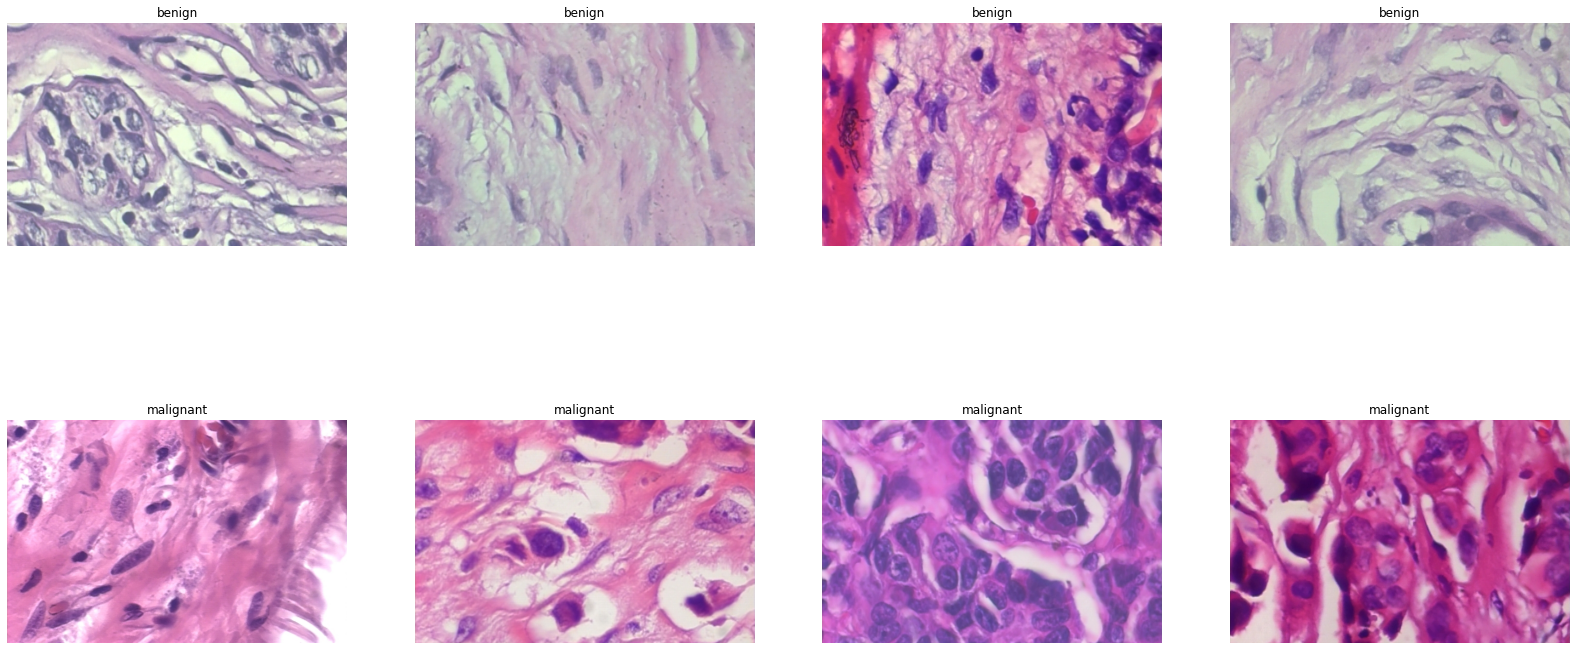

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download forderation/

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
api_token = {"username":"badrisrahmatullah","key":"7d77b1834e43edef1e04767eeb2fdf6e"}
import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download forderation/breakhis-400x

 99% 797M/803M [00:05<00:00, 182MB/s]
100% 803M/803M [00:05<00:00, 166MB/s]


In [ ]:
!unzip breakhis-400x.zip

Archive:  breakhis-400x.zip
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-001.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-003.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-004.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-005.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-007.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-011.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-015.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-019.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-025.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-027.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549AB-400-028.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549CD-400-004.png  
  inflating: BreaKHis 400X/test/benign/SOB_B_A-14-22549CD-400-006.png  
  inflating: BreaKHis 400X/test/beni

In [ ]:
base_dir = '/content/BreaKHis 400X'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_benign_dir = os.path.join(train_dir, 'benign')
train_malignant_dir = os.path.join(train_dir, 'malignant')

test_benign_dir = os.path.join(test_dir, 'benign')
test_malignant_dir = os.path.join(test_dir, 'malignant')

In [ ]:
import os

print(os.listdir(train_benign_dir)[:10])
print(os.listdir(train_malignant_dir)[:10])

['SOB_B_F-14-23060AB-400-010.png', 'SOB_B_A-14-22549G-400-029.png', 'SOB_B_TA-14-13200-400-013.png', 'SOB_B_A-14-22549CD-400-008.png', 'SOB_B_F-14-14134-400-021.png', 'SOB_B_TA-14-15275-400-011.png', 'SOB_B_PT-14-29315EF-400-012.png', 'SOB_B_F-14-21998EF-400-016.png', 'SOB_B_F-14-25197-400-053.png', 'SOB_B_PT-14-21998AB-400-050.png']
['SOB_M_DC-14-5694-400-018.png', 'SOB_M_DC-14-13993-400-007.png', 'SOB_M_DC-14-17901-400-003.png', 'SOB_M_LC-14-13412-400-009.png', 'SOB_M_PC-14-15704-400-021.png', 'SOB_M_DC-14-17614-400-010.png', 'SOB_M_LC-14-15570-400-015.png', 'SOB_M_PC-14-19440-400-016.png', 'SOB_M_DC-14-17901-400-013.png', 'SOB_M_LC-14-15570-400-037.png']


In [ ]:
# Cek jumlah data train dan data validation
print('total training benign images:', len(os.listdir(train_benign_dir)))
print('total training malignant images:', len(os.listdir(train_malignant_dir)))
print('total testing benign images:', len(os.listdir(test_benign_dir)))
print('total testing malignant images:', len(os.listdir(test_malignant_dir)))

total training benign images: 371
total training malignant images: 777
total testing benign images: 176
total testing malignant images: 369


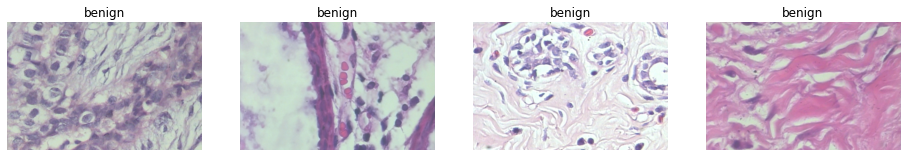

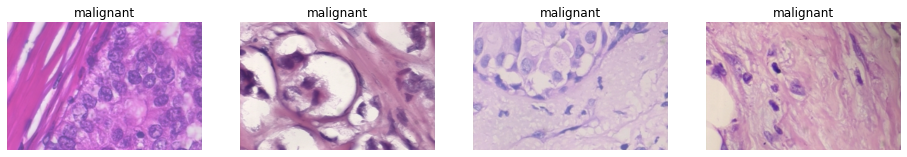

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mping

benign_dir=os.path.join('/content/BreaKHis 400X/train/benign')
malignant_dir=os.path.join('/content/BreaKHis 400X/train/malignant')

benign_image = os.listdir(benign_dir)
malignant_image = os.listdir(malignant_dir)

fname1 = [os.path.join(benign_dir,fname)
        for fname in benign_image[:4]]

fname2 = [os.path.join(malignant_dir,fname)
        for fname in malignant_image[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('benign')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('malignant')
    plt.imshow(img)
    
plt.show()

### 2. Preprocessing

Task yang perlu dikerjakan:
1. Gather data training dan testing dengan ukuran gambar **250x250**
2. Normalisasi dataset
3. Membuat label encoder


In [ ]:
# Tulis Kode Anda Disini

In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data testing
val_data = []
val_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
# Tampilkan shape dari data train dan data testing
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Testing Data = ", val_data.shape)
print("testing Label = ", val_label.shape)

Train Data =  (1148, 250, 250, 3)
Train Label =  (1148,)
Testing Data =  (545, 250, 250, 3)
testing Label =  (545,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [192 207 200]
Data setelah di-normalisasi  [0.7529412  0.8117647  0.78431374]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1]


### 3. Modelling

Task yang perlu dikerjakan:
1. Membuat & menampilkan scenario Pertama
2. Membuat & menampilkan summary model scenario Kedua
3. Training model scenario Pertama
4. Training model scenario Kedua

**Note:** Minimal epoch yang didefinisikan adalah 100 epoch untuk setiap model yang dibangun

In [ ]:
# Tulis Kode Anda Disini

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, AveragePooling2D, GlobalMaxPool2D, GlobalAveragePooling2D, Dropout, Flatten

In [ ]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[250,250,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(GlobalMaxPool2D())
model.add(Flatten())

In [ ]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Print model summary
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 250, 250, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 64)               

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
H = model.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
58/58 [==============================] - 5s 68ms/step - loss: 0.5944 - acc: 0.6829 - val_loss: 0.5342 - val_acc: 0.6862
Epoch 2/100
58/58 [==============================] - 3s 54ms/step - loss: 0.4696 - acc: 0.8084 - val_loss: 0.4724 - val_acc: 0.8128
Epoch 3/100
58/58 [==============================] - 3s 54ms/step - loss: 0.4506 - acc: 0.8127 - val_loss: 0.4474 - val_acc: 0.8422
Epoch 4/100
58/58 [==============================] - 3s 54ms/step - loss: 0.4160 - acc: 0.8354 - val_loss: 0.4203 - val_acc: 0.8569
Epoch 5/100
58/58 [==============================] - 3s 54ms/step - loss: 0.3743 - acc: 0.8720 - val_loss: 0.4478 - val_acc: 0.8055
Epoch 6/100
58/58 [==============================] - 3s 53ms/step - loss: 0.3744 - acc: 0.8580 - val_loss: 0.3880 - val_acc: 0.8477
Epoch 7/100
58/58 [==============================] - 3s 54ms/step - loss: 0.3538 - acc: 0.8737 - val_loss: 0.3709 - val_acc: 0.8661
Epoch 8/100
58/58 [==============================] - 3s 54ms/step - loss: 0.

In [ ]:
model1 = Sequential()

model1.add(InputLayer(input_shape=[250,250,3]))
model1.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(AveragePooling2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(AveragePooling2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(AveragePooling2D(pool_size=2, padding='same'))
model1.add(GlobalAveragePooling2D())
model1.add(Flatten())

In [ ]:
# Fully Connected Layer
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
# Print model summary
print(model1.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 250, 250, 16)      448       
_________________________________________________________________
average_pooling2d_3 (Average (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
average_pooling2d_4 (Average (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 63, 63, 64)        18496     
_________________________________________________________________
average_pooling2d_5 (Average (None, 32, 32, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)               

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model1.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
H1 = model1.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
58/58 [==============================] - 4s 61ms/step - loss: 0.6057 - acc: 0.6664 - val_loss: 0.5593 - val_acc: 0.6771
Epoch 2/100
58/58 [==============================] - 3s 53ms/step - loss: 0.5104 - acc: 0.7674 - val_loss: 0.4976 - val_acc: 0.8349
Epoch 3/100
58/58 [==============================] - 3s 53ms/step - loss: 0.4586 - acc: 0.8179 - val_loss: 0.4891 - val_acc: 0.8202
Epoch 4/100
58/58 [==============================] - 3s 53ms/step - loss: 0.4542 - acc: 0.7988 - val_loss: 0.4624 - val_acc: 0.8459
Epoch 5/100
58/58 [==============================] - 3s 55ms/step - loss: 0.4500 - acc: 0.8223 - val_loss: 0.5172 - val_acc: 0.7615
Epoch 6/100
58/58 [==============================] - 3s 53ms/step - loss: 0.4479 - acc: 0.8145 - val_loss: 0.4857 - val_acc: 0.8165
Epoch 7/100
58/58 [==============================] - 3s 54ms/step - loss: 0.4241 - acc: 0.8389 - val_loss: 0.4416 - val_acc: 0.8404
Epoch 8/100
58/58 [==============================] - 3s 54ms/step - loss: 0.

### 4. Result

Task yang perlu dikerjakan:
1. Plot hasil akurasi dan loss dari kedua model menjadi 1 canvas
2. Melakukan uji coba dari salah satu gambar test pada model 1 dan model 2
3. Klasifikasi report dari kedua model
4. Jika hasil akurasi model CNN klasifikasi report kedua model diatas 90%

**Contoh output**

Tugas 4.1

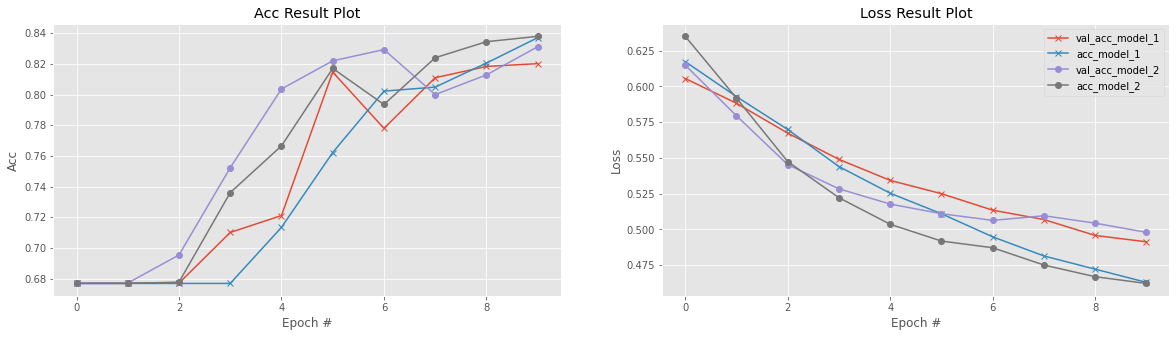

Tugas 4.2 

* Actual class ['benign']
* Hasil prediksi model 1
* Predicted class benign
* Hasil prediksi model 2
* Predicted class benign

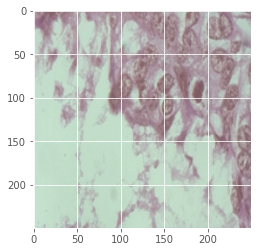

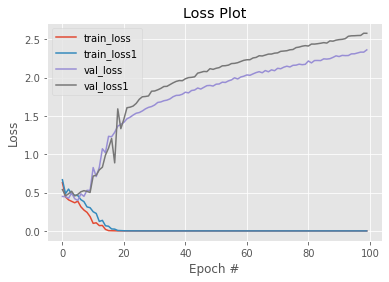

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H1.history["loss"], label="train_loss1")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H1.history["val_loss"], label="val_loss1")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

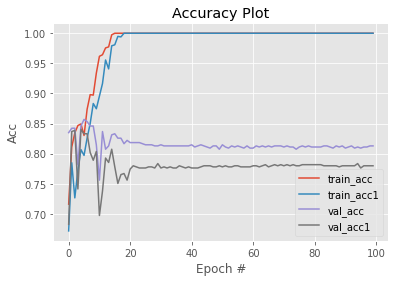

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H1.history["acc"], label="train_acc1")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.plot(np.arange(0, 100), H1.history["val_acc"], label="val_acc1")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       176
           1       0.92      0.92      0.92       369

    accuracy                           0.90       545
   macro avg       0.88      0.88      0.88       545
weighted avg       0.90      0.90      0.90       545



In [ ]:
pred = model1.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76       176
           1       0.87      0.93      0.90       369

    accuracy                           0.86       545
   macro avg       0.85      0.82      0.83       545
weighted avg       0.86      0.86      0.86       545



Saving SOB_B_A-14-22549AB-400-001.png to SOB_B_A-14-22549AB-400-001 (2).png
model 1
Predicted class malignant


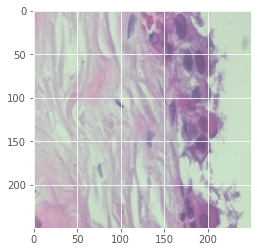

In [ ]:
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  img = image.load_img(fn, target_size=(250, 250,3))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  # classes2 = model2.predict(images, batch_size=32)

  print('model 1')
  if classes[0][0]:
    print('Predicted class benign')
  else:
    print('Predicted class malignant')

  # print('model 2')
  # if classes2[0][0]:
  #   print('Predicted class benign')
  # else:
  #   print('Predicted class malignant')

## Kegiatan 2 **(berkelompok)**
30 poin


**Ketentuan Wajib**
* Tulis dokumentasi tugas kelompok anda dalam file README.md
* Isi data tugas kelompok anda dalam google form berikut [cek disini](https://docs.google.com/forms/d/e/1FAIpQLSfXRa5gXfd4PcaxWkKifGsaliQ5koJL3xllT-oaTpPrrXU87Q/viewform?usp=sf_link)
* Cek daftar dataset seluruh praktikan [disini](https://docs.google.com/spreadsheets/d/1qyu5AVDhPhegpRTbNaDoq5qXX4_CX09Q7tYyD-fkF_c/edit?usp=sharing)
* Seluruh data harus terkumpul maksimal H-1 praktikum
* Tidak diperbolehkan berganti anggota kelompok selama satu semester ini
* Tidak diperbolehkan berganti repository selama mengerjakan tugas kelompok ini
* Pengantian dataset atau jurnal rujukan harap menginformasikan ke asisten terlebih dahulu
* Pastikan anda menggunakan akun github pribadi untuk melakukan commit dan push

**Penilaian**
* Keaktifan dalam tim
* Kontribusi dalam proyek dan tim
* Penerapan prinsip kerja Agile (sprint backlog dan report terdokumentasikan dengan baik)
* Kelengkapan dokumen proyek
* Progress pengerjaan tugas kelompok
* Pendokumentasian proyek "clear and clean documentation"

**Materi pendukung**
* [Project documentation](https://realpython.com/documenting-python-code)
* [Github readme](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)
* [Sprint backlog](https://www.lucidchart.com/blog/how-to-develop-a-product-backlog-in-agile)


**Tugas**

Melanjutkan tugas kelompok di modul sebelumya sekarang kerjakan beberapa poin berikut untuk didemokan kepada asisten masing-masing.

*   Melakukan proses preprocessing dataset
*   Melakukan training beberapa skema model menggunakan model CNN sederhana buatan sendiri **(minimal 2 model)** *tidak diperbolehkan menggunakan transfer learning*
* Menyimpan model yang telah di training kedalam file `.h5` [Lihat disini](https://www.tensorflow.org/tutorials/keras/save_and_load)
*  Mencatat hasil perkembangan tugas kelompok dalam file `sprint_project.xlsx` tandai masing-masing task dengan status **Done** *untuk task yang telah selesai dikerjakan*, **On Going** *untuk task yang dalam proses pengerjaan*, **Waiting** *untuk task yang belum atau akan dikerjakan*
* Pastikan anda menulis tanggal mulai dan tanggal selesai masing-masing task dengan benar
* Pastikan anda menulis penanggung jawab masing-masing task (Penanggung jawab bertugas menyelesaikan dan menuntaskan masing-masing task yang diberikan)
* `commit` dan `push` seluruh perkerjaan yang anda lakukan kedalam branch pribadi dalam repository tugas kelompok yang telah anda buat sebelumnya.
* Presentasikan kepada asisten tentang apa yang anda lakukakan selama mengerjakan tugas kelompok ini. Ceritakan tentang tugas masing-masing anggota,  kendala dalam mengerjakan tugas sampai solusi yang anda lakukan saat mengerjakan tugas kelompok ini.

